In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import argrelmax
import librosa
from librosa.display import specshow
import librosa.display

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análisis de Audios

### 1. Lectura del Audio

In [10]:
# Ruta el archivo mp3 del sonido binaural
ruta = "/content/drive/MyDrive/LAYDI VIVIANA/LAYDIHACKS/[Estudios] Master en Análisis de Datos/TFM/Muse/datos/audios/"
filename  = "1-alfa12.mp3"
filename  = "4-ambiental.mp3"
#filename =  "SonidoAmbiental.mp3"
# filename =  "SonidoBinaural.mp3"

audio = ruta + filename


In [11]:
# Reducir la duración del audio binaural
duracion_reducida = 200 # por ejemplo, 120 segundos
y, sampling_rate = librosa.load(audio, duration=duracion_reducida)

y_b, sr = librosa.load(audio,duration=duracion_reducida, mono=False)  # Cargar el audio en estéreo (dos canales)


Esta función librosa.load() nos devuelve dos salidas que llamamos y y sample_rates. Carga y decodifica el archivo de audio en un arreglo unidimensional y y la variable sample_rates guarda la frecuencia de muestreo, es decir,cuantas muestras de audio se tomaron por segundo. Por default el audio es reensamblado en 22,050 Hz, sin embargo, esto puede ser modidicado como argumento en la función librosa.load(). Por ejemplo, los CD tienen una velocidad de muestreo de 44.100 muestras por segundo, por lo que pueden reproducir frecuencias de hasta 22,050 Hz, lo que está justo por encima del límite de audición humana (20,000 Hz).

### Amplitud

y[t] tiene 4410000 muestras
la frecuencia de muestreo es 22.05kHz
y(t) tiene 200.0s 


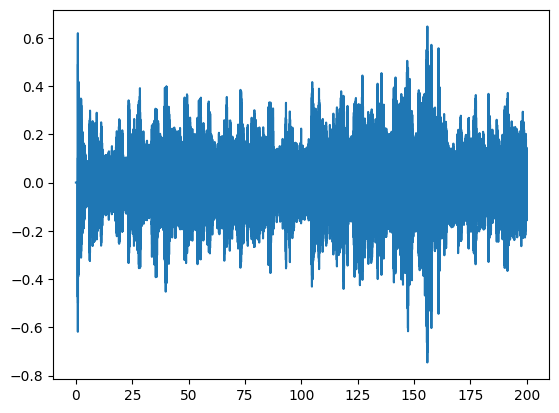

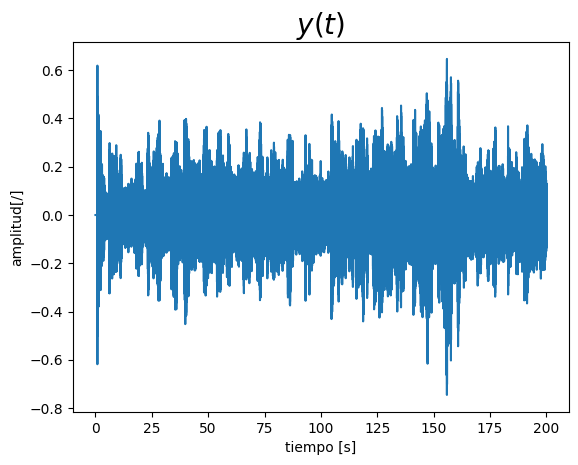

In [12]:

T = y.size / sampling_rate
dt = 1 / sampling_rate
t = np.r_[0:T:dt]
T = y.size / sampling_rate

#Ahora analizando un poco los datos que obtenemos de y es que podemos obtener el tiempo total T que dura
#la grabación al conocer su tamaño y dividiendo por la frecuencia de muestreo.

dt = 1 / sampling_rate

t = np.r_[0:T:dt]

print(
    f'y[t] tiene {y.size} muestras',
    f'la frecuencia de muestreo es {sampling_rate * 1e-3}kHz',
    f'y(t) tiene {T:.1f}s '
    , sep='\n')



plt.plot(t, y)
plt.figure()
plt.plot(t, y)
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud[/]')
plt.title(r'$y(t)$', size=20);


### Audio Binaural

In [13]:
# Verificar si los canales izquierdo y derecho son diferentes
diferentes = not (y_b[0] == y_b[1]).all()

if diferentes:
    print("El audio es binaural (estéreo con contenido diferente en los canales).")
else:
    print("El audio no es binaural (los canales izquierdo y derecho son idénticos).")


El audio no es binaural (los canales izquierdo y derecho son idénticos).


In [14]:
### Generar espectograma para cada canal
# Generar el espectrograma
spectrogram = librosa.feature.melspectrogram(y=y_b[0], sr=sr)
spectrogram_2 = librosa.feature.melspectrogram(y=y_b[1], sr=sr)


# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la canción')
plt.show()

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram_2, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la canción')
plt.show()

ParameterError: ignored

Frecuencia dominante: 40.6 Hz
Amplitud del pico: 21407.870868797087


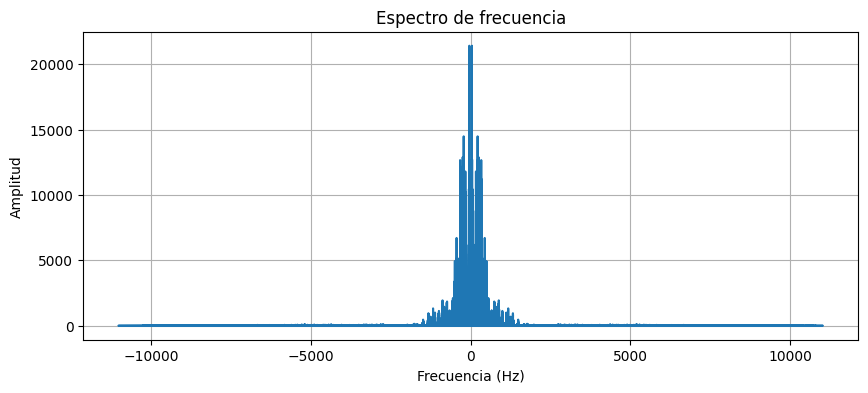

In [ ]:
# Calcular la transformada de Fourier de la señal de audio
fft_resultado = np.fft.fft(y_b[1])
frecuencias = np.fft.fftfreq(len(fft_resultado), 1/sr)

# Encontrar el índice de la frecuencia dominante (pico)
indice_pico = np.argmax(np.abs(fft_resultado))
frecuencia_pico = frecuencias[indice_pico]

# Calcular la amplitud del pico
amplitud_pico = np.abs(fft_resultado[indice_pico])

# Mostrar la frecuencia y amplitud del pico
print(f"Frecuencia dominante: {frecuencia_pico} Hz")
print(f"Amplitud del pico: {amplitud_pico}")

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Frecuencia dominante: 329.34000000000003 Hz
Amplitud del pico: 25980.138821724755


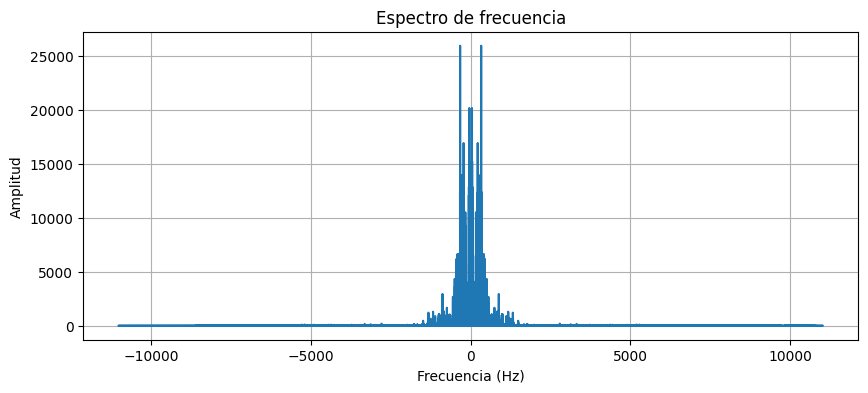

In [ ]:
# Calcular la transformada de Fourier de la señal de audio
fft_resultado = np.fft.fft(y_b[0])
frecuencias = np.fft.fftfreq(len(fft_resultado), 1/sr)

# Encontrar el índice de la frecuencia dominante (pico)
indice_pico = np.argmax(np.abs(fft_resultado))
frecuencia_pico = frecuencias[indice_pico]

# Calcular la amplitud del pico
amplitud_pico = np.abs(fft_resultado[indice_pico])

# Mostrar la frecuencia y amplitud del pico
print(f"Frecuencia dominante: {frecuencia_pico} Hz")
print(f"Amplitud del pico: {amplitud_pico}")

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

### Espectograma

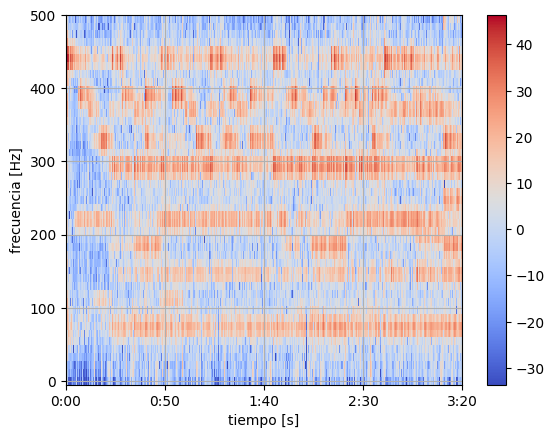

In [15]:
X = librosa.stft(y)
X_dB = librosa.amplitude_to_db(np.abs(X))
X = librosa.stft(y)


#Para obtener la norma (tamaño del vector) de estos números complejos utilizamos numpy.absolute().
#Esta función lo que hace es que si tiene un número de la forma $$a+bi$$ entonces nos devuelve su norma: $$\sqrt(a^2+b^2)$$
X_dB = librosa.amplitude_to_db(np.abs(X))


#Ahora convertimos la amplitud a decibeles, que es una escala logaritmica de medidas de contraste.

#En esta línea cargamos la función specshow con las variables de interes, la amplitud en decibeles X_db y la frecuencia de muestreo sampling_rate.
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('tiempo [s]')
plt.ylabel('frecuencia [Hz]')
#Establezco el máximo en el eje de las ordenadas.
plt.ylim(top=500)
#Pido que se muestre la barra de color para darnos una idea del rango de amplitudes en decibeles.
plt.colorbar()
plt.grid(True)

### Espectro de Frecuencia con Fourier

Frecuencia dominante: -180.0 Hz
Amplitud del pico: 771913.7618019794


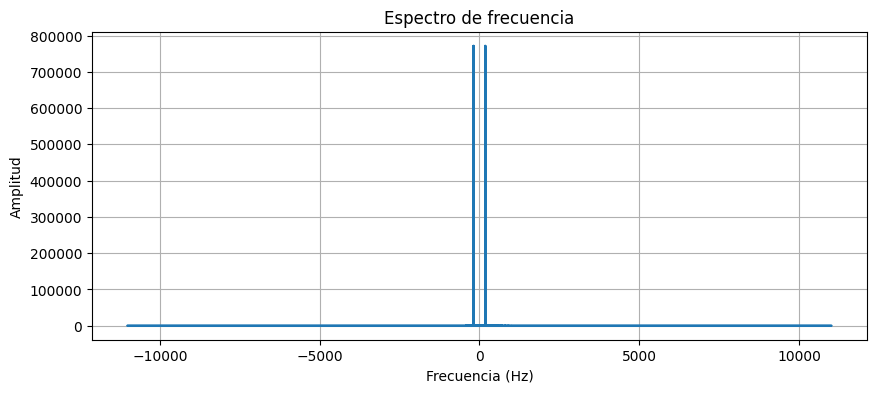

In [ ]:
# Calcular la transformada de Fourier de la señal de audio
fft_resultado = np.fft.fft(y)
frecuencias = np.fft.fftfreq(len(fft_resultado), 1/sr)

# Encontrar el índice de la frecuencia dominante (pico)
indice_pico = np.argmax(np.abs(fft_resultado))
frecuencia_pico = frecuencias[indice_pico]

# Calcular la amplitud del pico
amplitud_pico = np.abs(fft_resultado[indice_pico])

# Mostrar la frecuencia y amplitud del pico
print(f"Frecuencia dominante: {frecuencia_pico} Hz")
print(f"Amplitud del pico: {amplitud_pico}")

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

### Frecuencia de Audio

<ipython-input-68-f99e421d7f68>:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


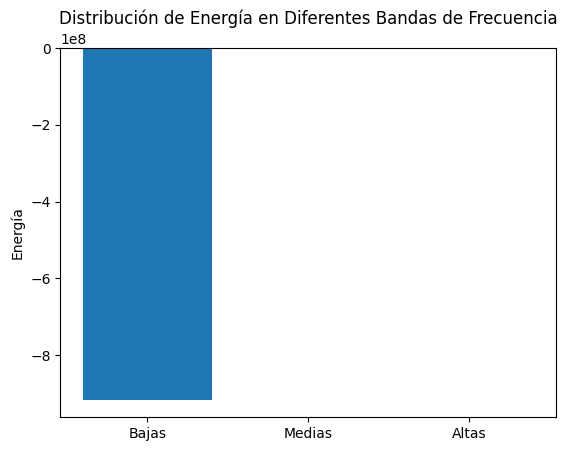

In [ ]:
# Reducir la duración del audio binaural
duracion_reducida = 120  # por ejemplo, 120 segundos

# Cargar el archivo de audio
y, sr = librosa.load(audio, sr=None, duration=duracion_reducida)

# Calcular el espectrograma
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Calcular la energía en diferentes bandas de frecuencia
energia_total = np.sum(D)  # Energía total del espectrograma

# Definir las bandas de frecuencia de interés (por ejemplo, baja, media, alta)
frecuencias_bajas = (0, 500)  # Frecuencias bajas hasta 500 Hz
frecuencias_medias = (500, 2000)  # Frecuencias medias de 500 a 2000 Hz
frecuencias_altas = (2000, 5000)  # Frecuencias altas de 2000 a 5000 Hz

# Calcular la energía en cada banda de frecuencia
energia_bajas = np.sum(D[(librosa.time_to_frames(frecuencias_bajas[0], sr=sr)):librosa.time_to_frames(frecuencias_bajas[1], sr=sr), :])
energia_medias = np.sum(D[(librosa.time_to_frames(frecuencias_medias[0], sr=sr)):librosa.time_to_frames(frecuencias_medias[1], sr=sr), :])
energia_altas = np.sum(D[(librosa.time_to_frames(frecuencias_altas[0], sr=sr)):librosa.time_to_frames(frecuencias_altas[1], sr=sr), :])

# Visualizar la distribución de energía en diferentes bandas de frecuencia
etiquetas = ['Bajas', 'Medias', 'Altas']
valores = [energia_bajas, energia_medias, energia_altas]

plt.bar(etiquetas, valores)
plt.ylabel('Energía')
plt.title('Distribución de Energía en Diferentes Bandas de Frecuencia')
plt.show()

### Fourier Ejemplo

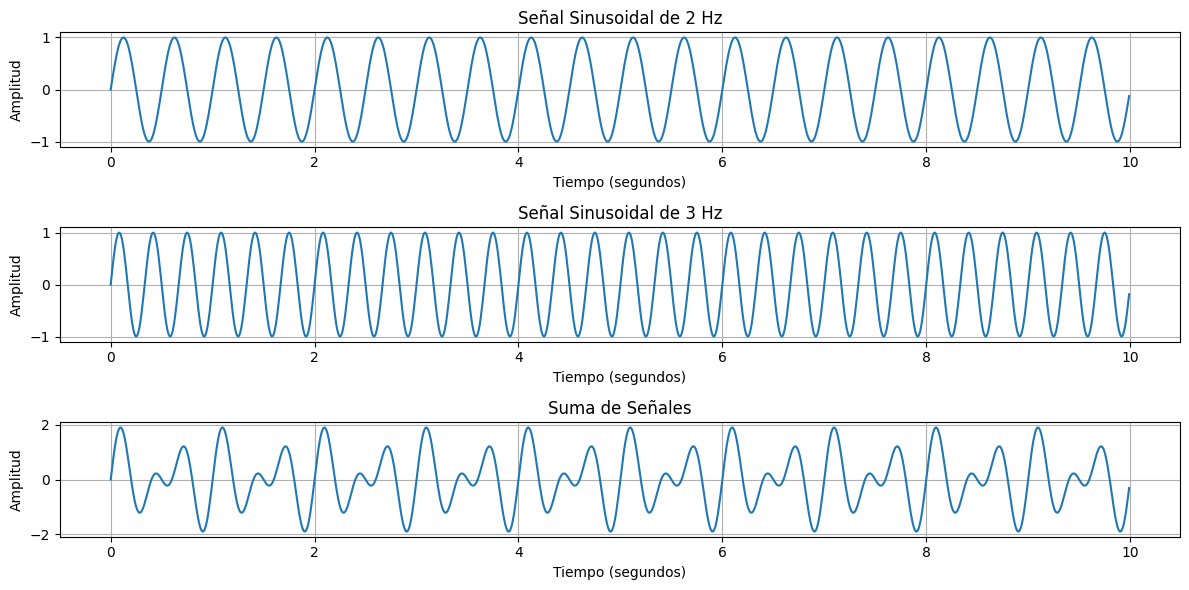

In [ ]:


# Configuración de las señales
frecuencia1 = 2  # Frecuencia en Hz para la primera señal
frecuencia2 = 3  # Frecuencia en Hz para la segunda señal
duracion = 10 # Duración en segundos
tasa_muestreo = 100  # Tasa de muestreo en Hz

# Generar el vector de tiempo
tiempo = np.arange(0, duracion, 1/tasa_muestreo)

# Generar las señales sinusoidales
senal1 = np.sin(2 * np.pi * frecuencia1 * tiempo)
senal2 = np.sin(2 * np.pi * frecuencia2 * tiempo)

# Sumar las señales
senal_sumada = senal1 + senal2

# Graficar las señales y la suma
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(tiempo, senal1)
plt.title('Señal Sinusoidal de 2 Hz')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo, senal2)
plt.title('Señal Sinusoidal de 3 Hz')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo, senal_sumada)
plt.title('Suma de Señales')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()



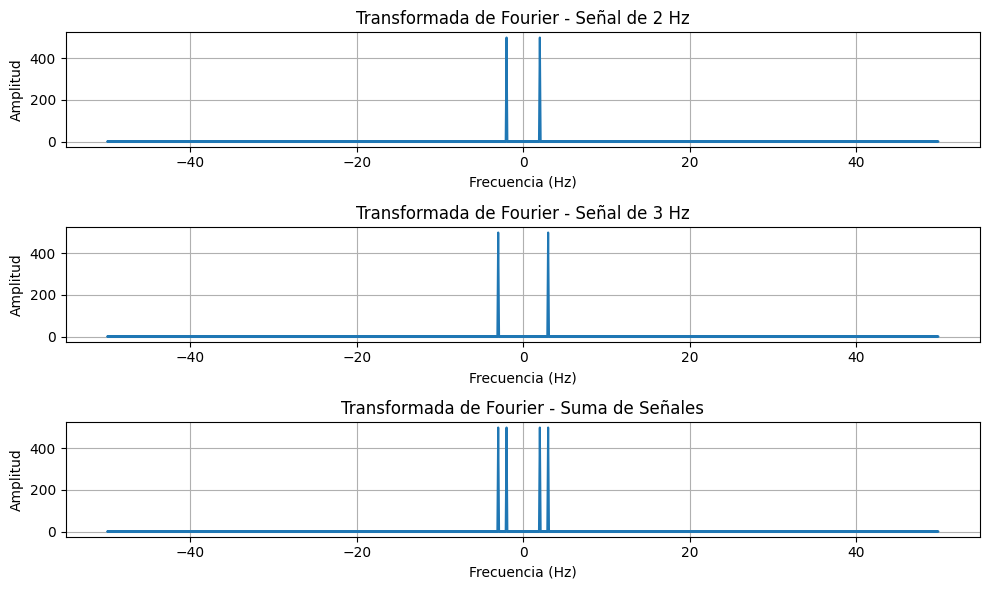

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Función para calcular la Transformada de Fourier y obtener las frecuencias correspondientes
def calcular_fft(senal, tasa_muestreo):
    n = len(senal)
    fft_resultado = fft(senal)
    frecuencias = np.fft.fftfreq(n, 1/tasa_muestreo)
    return frecuencias, np.abs(fft_resultado)

# Configuración de las señales
frecuencia1 = 2  # Frecuencia en Hz para la primera señal
frecuencia2 = 3  # Frecuencia en Hz para la segunda señal
duracion = 10  # Duración en segundos
tasa_muestreo = 100  # Tasa de muestreo en Hz

# Generar el vector de tiempo
tiempo = np.arange(0, duracion, 1/tasa_muestreo)

# Generar las señales sinusoidales
senal1 = np.sin(2 * np.pi * frecuencia1 * tiempo)
senal2 = np.sin(2 * np.pi * frecuencia2 * tiempo)
senal_sumada = senal1 + senal2

# Calcular la Transformada de Fourier para cada señal
frecuencias1, fft_senal1 = calcular_fft(senal1, tasa_muestreo)
frecuencias2, fft_senal2 = calcular_fft(senal2, tasa_muestreo)
frecuencias_sumada, fft_senal_sumada = calcular_fft(senal_sumada, tasa_muestreo)

# Graficar la Transformada de Fourier
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(frecuencias1, fft_senal1)
plt.title('Transformada de Fourier - Señal de 2 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(frecuencias2, fft_senal2)
plt.title('Transformada de Fourier - Señal de 3 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(frecuencias_sumada, fft_senal_sumada)
plt.title('Transformada de Fourier - Suma de Señales')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()